In [143]:
import pandas as pd

#Loading my dataset
first_df = pd.read_csv('../Book-Reading-Analysis-Project/March 7-April 4, 2016 - Libraries - CSV.csv')

#Creating a list of relevant columns
relCol = ['psraid', 'books1', 'books2a','books2b', 'books2c', 'device1a', 'device1b', 'device1c', 'device1d', 'sex', 'age', 'educ2']

#Filtering in a new dataframe with relevant columns only
rel_df = first_df[relCol]

#Checking 
print(rel_df.info())

#Renaming columns for clarity - referenced through the questionnaire used to gather the dataset
df = rel_df.rename(columns={'psraid': 'respondent_id', 'books1': 'books_read_1year', 'books2a': 'print_books', 'books2b': 'audiobooks', 
'books2c': 'ebooks', 'device1a': 'smartphone', 'device1b': 'ebook_reader', 'device1c': 'tablet', 'device1d': 'laptop', 
'sex':'gender', 'age': 'age', 'educ2': 'education'})

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1601 entries, 0 to 1600
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   psraid    1601 non-null   int64 
 1   books1    1601 non-null   int64 
 2   books2a   1601 non-null   object
 3   books2b   1601 non-null   object
 4   books2c   1601 non-null   object
 5   device1a  1601 non-null   object
 6   device1b  1601 non-null   int64 
 7   device1c  1601 non-null   int64 
 8   device1d  1601 non-null   int64 
 9   sex       1601 non-null   int64 
 10  age       1601 non-null   int64 
 11  educ2     1601 non-null   int64 
dtypes: int64(8), object(4)
memory usage: 150.2+ KB
None


,respondent_id,books_read_1year,print_books,audiobooks,ebooks,smartphone,ebook_reader,tablet,laptop,gender,age,education
0,100001,10,1,1,1,1,1,2,1,2,34,4
1,100003,4,1,2,2,2,2,2,1,1,53,4
2,100005,7,2,2,2,1,2,1,1,2,49,5
3,100009,30,1,2,2,1,2,2,1,1,73,3
4,100014,15,1,2,1,1,1,1,2,2,63,8


In [144]:
import numpy as np

"""
Assessing and changing input values to make them meaningful - referenced through the questionnaire, for example in print books 1 means
yes or 8 mean's don't know changing it for clarity and also removing values like refused/I don't know so that they can be ignored in
my calculations.
"""

value_change = { 1: 'yes', 2: 'no', 8: np.nan, 9: np.nan}

columns_to_replace = [
    'print_books', 'audiobooks', 'ebooks', 'ebook_reader',
    'smartphone', 'tablet', 'laptop'
]
df[columns_to_replace] = df[columns_to_replace].replace(value_change)

columns_Left_unchanged= ['print_books', 'audiobooks', 'ebooks', 'smartphone']
string_value_change = { '1': 'yes', '2': 'no', '8': np.nan, '9': np.nan}
df[columns_Left_unchanged] = df[columns_Left_unchanged].replace(string_value_change)

#print(type(df['print_books'].iloc[0]))

df.head()



,respondent_id,books_read_1year,print_books,audiobooks,ebooks,smartphone,ebook_reader,tablet,laptop,gender,age,education
0,100001,10,yes,yes,yes,yes,yes,no,yes,2,34,4
1,100003,4,yes,no,no,no,no,no,yes,1,53,4
2,100005,7,no,no,no,yes,no,yes,yes,2,49,5
3,100009,30,yes,no,no,yes,no,no,yes,1,73,3
4,100014,15,yes,no,yes,yes,yes,yes,no,2,63,8


In [145]:
#Checking the datatype before replacement to avoid the error on the previous columns
print(df['books_read_1year'].dtype)

#Defining the meaningful replacements for the 'books_read_12months' column, number 98 and 99 refer to I don't know/refused
books_read_replacements = {98: np.nan, 99: np.nan}
columns_to_replace= ['books_read_1year', 'age']

#Applying the replacements
df[columns_to_replace] = df[columns_to_replace].replace(books_read_replacements)

#Checking the results
print("Value counts for the 'books_read_12months' column after cleaning:")
print(df[columns_to_replace].value_counts(dropna=False).sort_index())
df.info()
df.head()


int64
Value counts for the 'books_read_12months' column after cleaning:
books_read_1year  age 
0.0               17.0    2
                  18.0    3
                  19.0    4
                  20.0    7
                  21.0    5
                         ..
NaN               79.0    1
                  82.0    1
                  83.0    1
                  84.0    1
                  86.0    1
Name: count, Length: 854, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1601 entries, 0 to 1600
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   respondent_id     1601 non-null   int64  
 1   books_read_1year  1578 non-null   float64
 2   print_books       1596 non-null   object 
 3   audiobooks        1597 non-null   object 
 4   ebooks            1597 non-null   object 
 5   smartphone        1601 non-null   object 
 6   ebook_reader      1594 non-null   object 
 7   tablet            1596 

,respondent_id,books_read_1year,print_books,audiobooks,ebooks,smartphone,ebook_reader,tablet,laptop,gender,age,education
0,100001,10.0,yes,yes,yes,yes,yes,no,yes,2,34.0,4
1,100003,4.0,yes,no,no,no,no,no,yes,1,53.0,4
2,100005,7.0,no,no,no,yes,no,yes,yes,2,49.0,5
3,100009,30.0,yes,no,no,yes,no,no,yes,1,73.0,3
4,100014,15.0,yes,no,yes,yes,yes,yes,no,2,63.0,8


In [159]:
#Printing the value counts for the education column to check for any discrepancies
print(df['education'].value_counts().sort_index())

#Defining the replacements for the education column
education_replacements = {
    1: 'Less than high school',
    2: 'High school graduate or GED',
    3: 'Some college, no degree',
    4: 'Two-year associate degree',
    5: 'Four-year college degree or bachelor\'s degree',
    6: 'Postgraduate or professional degree',
    7: 'Unknown', # New category for undocumented values
    8: 'Unknown', # New category for undocumented values
    98: np.nan,
    99: np.nan
}

#Applying the replacements
df['education'] = df['education'].replace(education_replacements)

#Checking the results
print("Value counts for education column after cleaning:")
print(df['education'].value_counts(dropna=False).sort_index())
df.head()


education
Four-year college degree or bachelor's degree    158
High school graduate or GED                      118
Less than high school                             53
Postgraduate or professional degree              365
Some college, no degree                          382
Two-year associate degree                        232
Unknown                                          284
Name: count, dtype: int64
Value counts for education column after cleaning:
education
Four-year college degree or bachelor's degree    158
High school graduate or GED                      118
Less than high school                             53
Postgraduate or professional degree              365
Some college, no degree                          382
Two-year associate degree                        232
Unknown                                          284
NaN                                                9
Name: count, dtype: int64


,respondent_id,books_read_1year,print_books,audiobooks,ebooks,smartphone,ebook_reader,tablet,laptop,gender,age,education,is_frequent_reader
0,100001,10.0,yes,yes,yes,yes,yes,no,yes,Unknown,34.0,Two-year associate degree,1
1,100003,4.0,yes,no,no,no,no,no,yes,Unknown,53.0,Two-year associate degree,0
2,100005,7.0,no,no,no,yes,no,yes,yes,Unknown,49.0,Four-year college degree or bachelor's degree,1
3,100009,30.0,yes,no,no,yes,no,no,yes,Unknown,73.0,"Some college, no degree",1
4,100014,15.0,yes,no,yes,yes,yes,yes,no,Unknown,63.0,Unknown,1


       respondent_id  books_read_1year       gender          age
count    1601.000000       1578.000000  1601.000000  1571.000000
mean   177284.073079         13.009506     1.479700    49.311267
std     44169.062548         21.835624     0.499744    18.850380
min    100001.000000          0.000000     1.000000    16.000000
25%    101976.000000          1.000000     1.000000    33.000000
50%    201722.000000          4.000000     1.000000    51.000000
75%    203760.000000         12.000000     2.000000    64.000000
max    205861.000000         97.000000     2.000000    95.000000


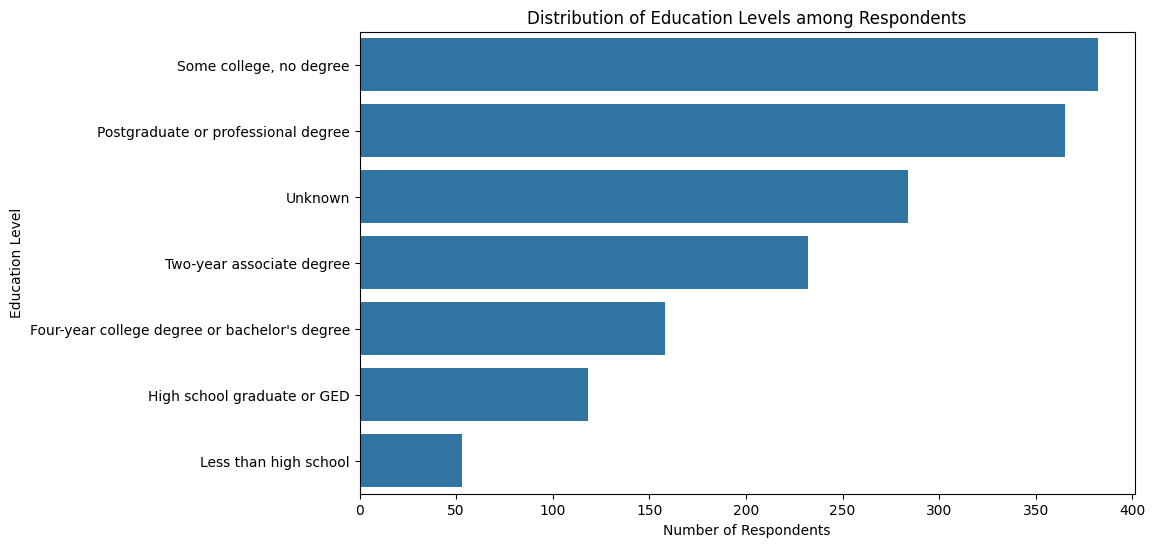

In [147]:
import matplotlib.pyplot as plot
import seaborn as sns

#Exploratory Data Analysis

#First describe the data to get a statistical analysis of the data
print(df.describe())

#Creating a bar chart to analyze the education column
plot.figure(figsize=(10, 6))
sns.countplot(y='education', data=df, order=df['education'].value_counts().index)
plot.title('Distribution of Education Levels among Respondents')
plot.xlabel('Number of Respondents')
plot.ylabel('Education Level')
plot.show()



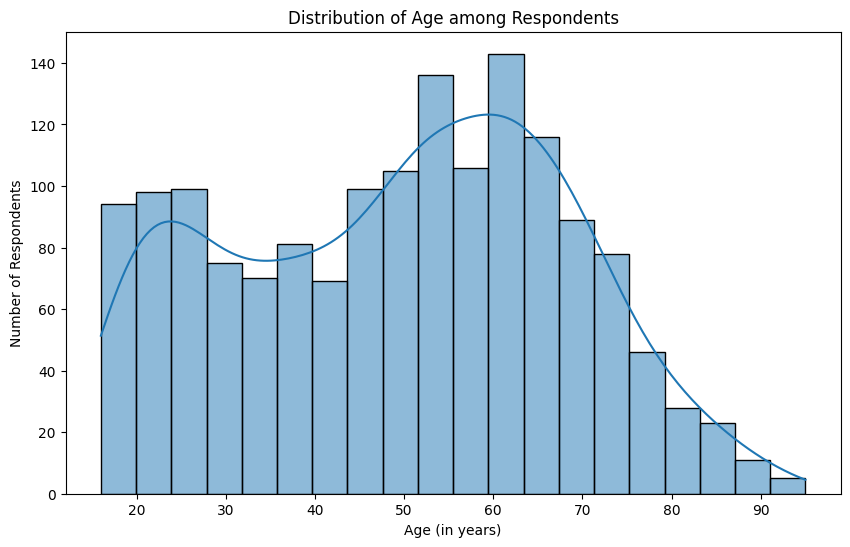

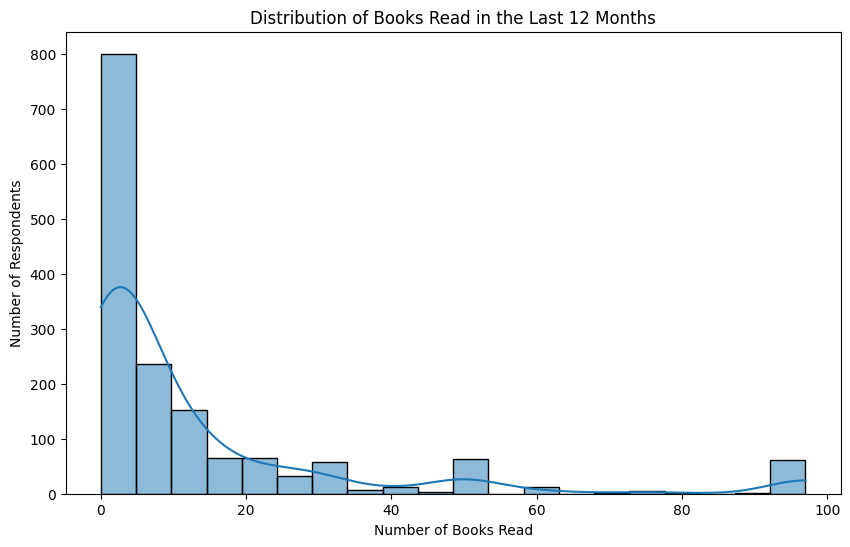

In [148]:
#Creating a histogram for the age column
plot.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True)
plot.title('Distribution of Age among Respondents')
plot.xlabel('Age (in years)')
plot.ylabel('Number of Respondents')
plot.show()

#Creating a histogram for the books read in a year column
plot.figure(figsize=(10, 6))
sns.histplot(df['books_read_1year'], bins=20, kde=True)
plot.title('Distribution of Books Read in the Last 12 Months')
plot.xlabel('Number of Books Read')
plot.ylabel('Number of Respondents')
plot.show()

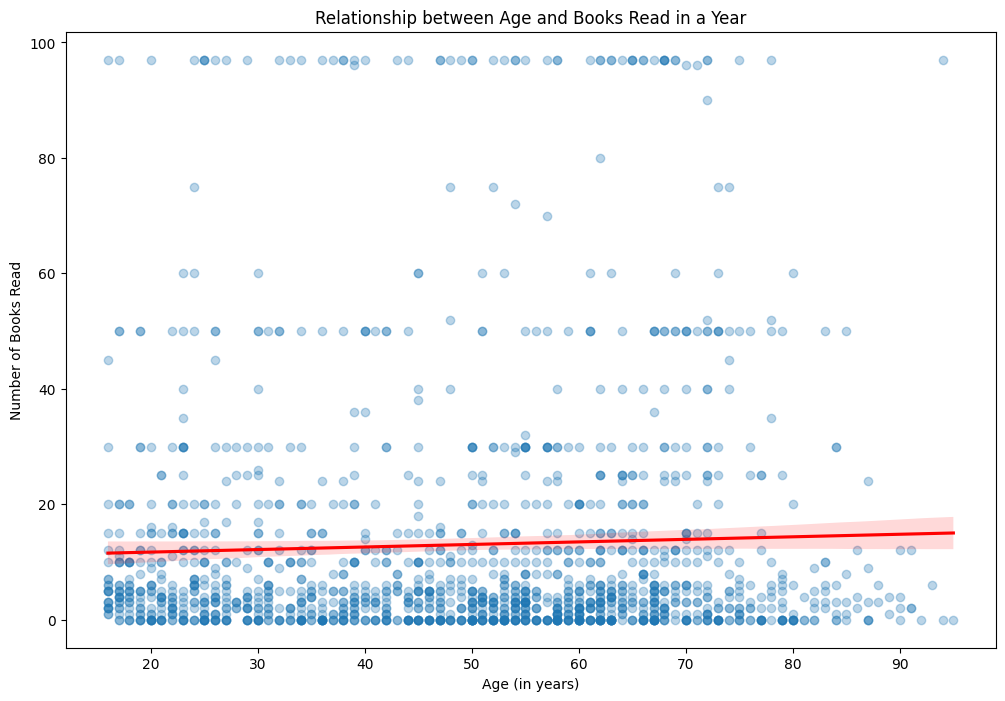

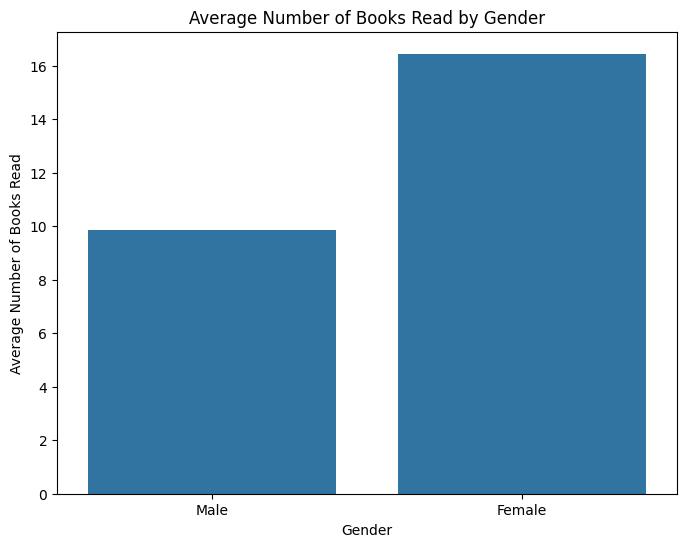

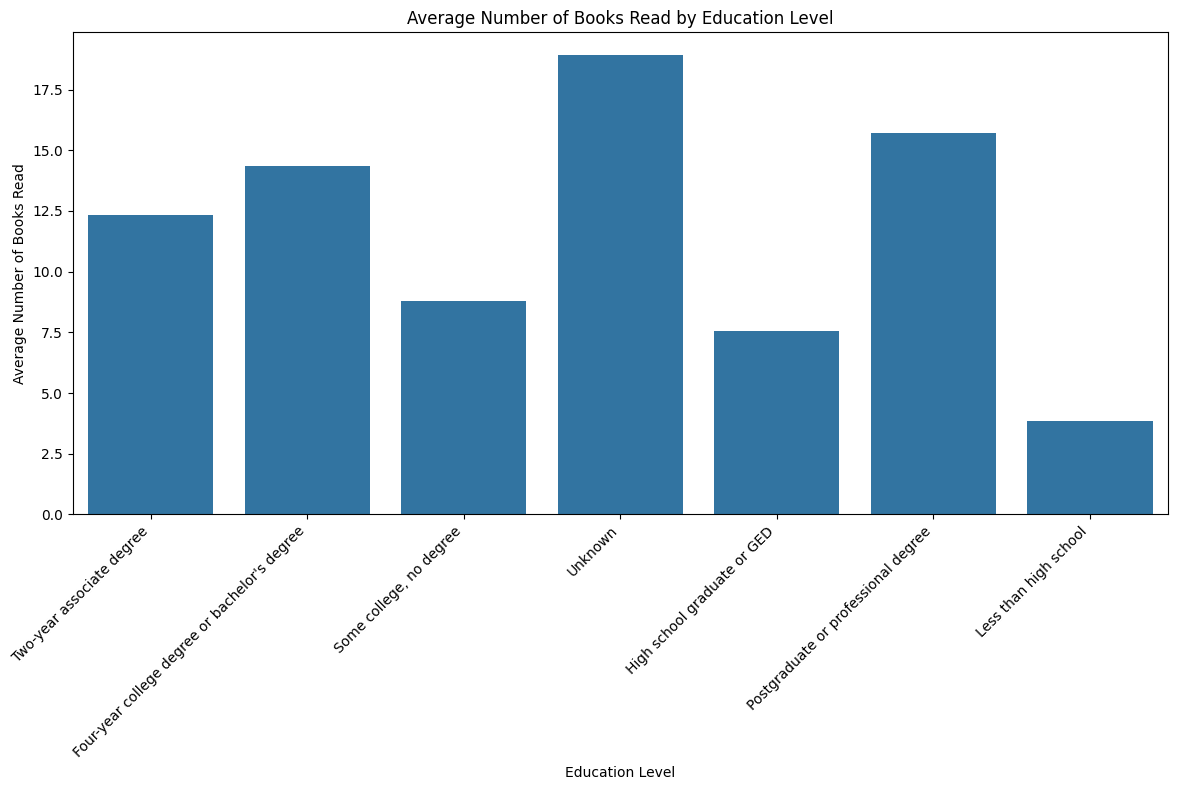

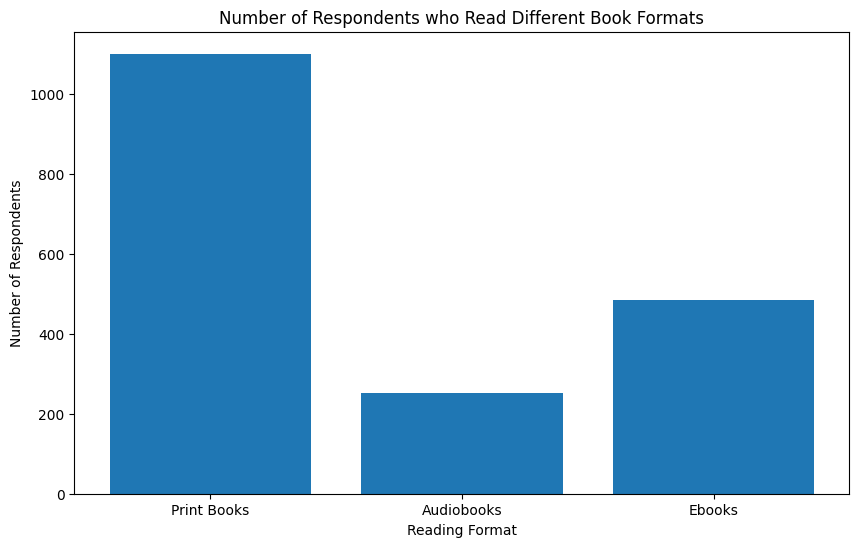

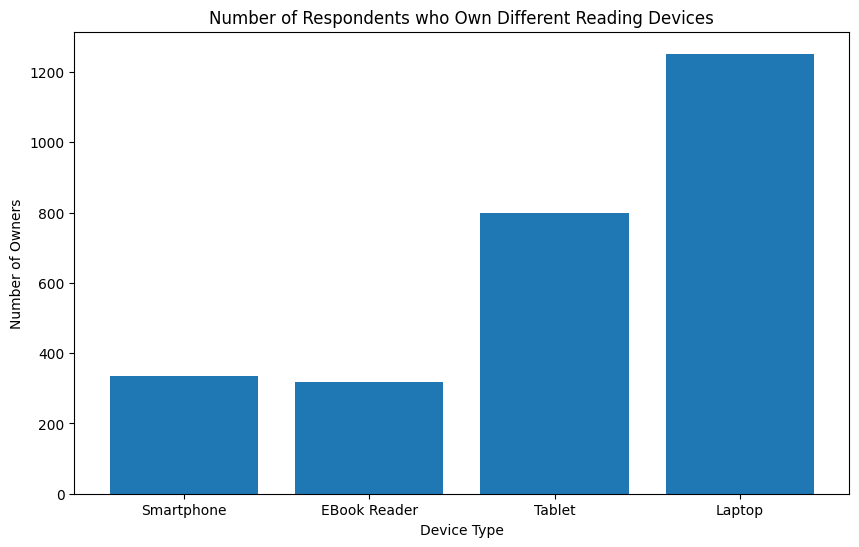

In [149]:
#Analysing relationships in key variables now, after individually displaying them

#Creating a scatter plot of age vs. books read in 1 year
plot.figure(figsize=(12, 8))
sns.regplot(x='age', y='books_read_1year', data=df, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plot.title('Relationship between Age and Books Read in a Year')
plot.xlabel('Age (in years)')
plot.ylabel('Number of Books Read')
plot.show()

#Creating a bar plot of books read by gender
plot.figure(figsize=(8, 6))
sns.barplot(x='gender', y='books_read_1year', data=df, errorbar=None)
plot.title('Average Number of Books Read by Gender')
plot.xlabel('Gender')
plot.ylabel('Average Number of Books Read')
plot.xticks(ticks=[0, 1], labels=['Male', 'Female']) # 1=Male, 2=Female
plot.show()

#Creating a bar plot of books read by education level
plot.figure(figsize=(12, 8))
sns.barplot(x='education', y='books_read_1year', data=df, errorbar=None)
plot.title('Average Number of Books Read by Education Level')
plot.xlabel('Education Level')
plot.ylabel('Average Number of Books Read')
plot.xticks(rotation=45, ha='right')
plot.tight_layout()
plot.show()

#Creating a bar chart to the types of books people read and the devices they own.
#Counting the number of yes responses for each reading format
read_formats = {
    'Print Books': (df['print_books'] == 'yes').sum(),
    'Audiobooks' : (df['audiobooks'] == 'yes').sum(),
    'Ebooks': (df['ebooks'] == 'yes').sum()
}
count = pd.DataFrame(read_formats.items(), columns=['Reading Format', 'Number of Readers'])

plot.figure(figsize=(10,6))
plot.bar(count['Reading Format'], count['Number of Readers']) 
plot.title('Number of Respondents who Read Different Book Formats')
plot.xlabel('Reading Format')
plot.ylabel('Number of Respondents')
plot.show()

#Counting the number of yes responses for the use/ownership of different devices
device_types = {
    'Smartphone': (df['smartphone'] == 'yes').sum(),
    'EBook Reader': (df['ebook_reader'] == 'yes').sum(),
    'Tablet': (df['tablet'] == 'yes').sum(),
    'Laptop': (df['laptop'] == 'yes').sum()
}
count_devices = pd.DataFrame(device_types.items(), columns=['Device Type', 'Number of Owners'])
plot.figure(figsize=(10,6))
plot.bar(count_devices['Device Type'], count_devices['Number of Owners']) 
plot.title('Number of Respondents who Own Different Reading Devices')
plot.xlabel('Device Type')
plot.ylabel('Number of Owners')
plot.show()



In [150]:
#PART 2: PYTHON ANALYTICS TASKS
#3. Apply a Machine Learning or Clustering Model

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split


"""
I chose to use the classification model-supervised Logistic Regression. In order to predict whether someone is a frequent reader and 
what suggestions can be given to him/her in order to read more. I also end up doing the random forest model because I wanted to 
compare the metrics and see which one is higher: The LogisticRegression won with higher accuracy percentages

First my leading question is: "Is a respondent a frequent reader or not?" for that I wll# Create a new binary target variable
 'is_frequent_reader'
"""

#Use the median (4 books) as my threshold for 'frequent reader'
df['is_frequent_reader'] = (df['books_read_1year'] > 4).astype(int)

#Checking the value counts of our new target variable
print(df['is_frequent_reader'].value_counts())

#Creating the dataframe for the model and the x and y
df_md = df.drop('books_read_1year', axis=1)
df_model = df_md.dropna()

#Separating the x and y variables
X = df_model.drop('is_frequent_reader', axis=1)
y = df_model['is_frequent_reader']

cat_cols = ['gender', 'education', 'print_books', 'audiobooks',
                        'ebooks', 'smartphone', 'ebook_reader', 'tablet',
                        'laptop']

#Droping the respondent_id column, as it is not a feature for the model
X_for_encoding = X.drop('respondent_id', axis=1)

# Perform one-hot encoding on the cleaned data
X_encoded = pd.get_dummies(X_for_encoding, columns=cat_cols, drop_first=True)
print("Shape of the final feature set:", X_encoded.shape)
print("Shape of the target set:", y.shape)
print("\n\n Checking new encoded columns created:")

print(X_encoded.head())

#Spliting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

#Printing the shapes of the resulting sets to verify the split
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

#Running and training the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
print("\n\nLogistic model training!")

#Making predictions on the test set
y_pred = model.predict(X_test)

#Calculating the performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

#Printing the results
print(f"Accuracy: {accuracy:.2%}")
print(f"Precision: {precision:.2%}")
print(f"Recall: {recall:.2%}")
print(f"F1-Score: {f1:.2%}")

#Running and training another model: Random Forest classifier to see if it can provide better results
print("\n\nRandom Forest training!")
model_rf = RandomForestClassifier(n_estimators=100)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {accuracy_rf:.2%}")
print(f"Random Forest Precision: {precision_rf:.2%}")
print(f"Random Forest Recall: {recall_rf:.2%}")
print(f"Random Forest F1-Score: {f1_rf:.2%}")


is_frequent_reader
0    823
1    778
Name: count, dtype: int64
Shape of the final feature set: (1544, 19)
Shape of the target set: (1544,)


 Checking new encoded columns created:
    age  gender_2  education_High school graduate or GED   
0  34.0      True                                  False  \
1  53.0     False                                  False   
2  49.0      True                                  False   
3  73.0     False                                  False   
4  63.0      True                                  False   

   education_Less than high school   
0                            False  \
1                            False   
2                            False   
3                            False   
4                            False   

   education_Postgraduate or professional degree   
0                                          False  \
1                                          False   
2                                          False   
3                     

In [151]:
#Creativity section: Part 1
"""
I thought about creating a user interface where a user can input their age, gender, education level, and which devices they own
and from that the model will predict whether they are a frequent reader or not and then recommend to them tips to make them
read more.

But first, in order to do that, I am going to analyze books read versus device ownership in male and female
"""


df_clean = df.dropna(subset=['books_read_1year'])
avg_books_by_gender_device = {}
devices = ['smartphone', 'ebook_reader', 'tablet', 'laptop']

"""
The outer loop iterates through each unique gender in my cleaned dataset. The inner loop then iterates through each device in the
devices list for that specific gender.
"""

gender_mapping = {1: 'Male', 2: 'Female'}
for gender in df_clean['gender'].unique():
    gender_label = gender_mapping[gender]
    for device in devices:
        #Filtering for the current gender being processed at a time
        df_gender = df_clean[df_clean['gender'] == gender]

        #Calculating average books read for owners of the device by the current gender
        avg_books_owners = df_gender[df_gender[device] == 'yes']['books_read_1year'].mean()

        # Calculate average books read for non-owners of the device by the current gender
        avg_books_non_owners = df_gender[df_gender[device] == 'no']['books_read_1year'].mean()

        avg_books_by_gender_device[f'{gender_label} with {device}'] = {
            'owners': avg_books_owners,
            'non_owners': avg_books_non_owners
        }

#Printing the results
for key, value in avg_books_by_gender_device.items():
    print(f"Average books for {key}:")
    print(f"  Owners: {value['owners']:.2f}")
    print(f"  Non-owners: {value['non_owners']:.2f}")
    print("-" * 20)



Average books for Female with smartphone:
  Owners: 17.59
  Non-owners: 8.98
--------------------
Average books for Female with ebook_reader:
  Owners: 27.07
  Non-owners: 13.44
--------------------
Average books for Female with tablet:
  Owners: 18.84
  Non-owners: 13.81
--------------------
Average books for Female with laptop:
  Owners: 18.38
  Non-owners: 9.52
--------------------
Average books for Male with smartphone:
  Owners: 12.46
  Non-owners: 5.64
--------------------
Average books for Male with ebook_reader:
  Owners: 14.08
  Non-owners: 8.95
--------------------
Average books for Male with tablet:
  Owners: 11.52
  Non-owners: 8.37
--------------------
Average books for Male with laptop:
  Owners: 11.03
  Non-owners: 5.56
--------------------


In [152]:
#CREATIVILTY SECTION: PART 2 Creating the UI interface

import ipywidgets as widgets
from IPython.display import display, clear_output, HTML


#Creating a dictionary to store the insights from the previous step
recommendation_data = {
    'Female_ebook_reader': {'owners': 27.07, 'non_owners': 13.44},
    'Male_ebook_reader': {'owners': 14.08, 'non_owners': 8.95},
    'Female_tablet': {'owners': 18.84, 'non_owners': 13.81},
    'Male_tablet': {'owners': 11.52, 'non_owners': 8.37},
    'Male_laptop': {'owners': 11.03, 'non_owners': 5.56},
    'Female_laptop': {'owners': 18.38, 'non_owners': 9.52},
    'Female_smartphone': {'owners': 17.59, 'non_owners': 8.98},
    'Male_smartphone': {'owners': 12.46, 'non_owners': 5.64}
}

#Creating a stylish title
title = widgets.HTML(
    value="""<h1 style="text-align: center; font-family: 'Times New Roman', 
    serif; font-style: italic; color: #ff69b4;">Rachel's Reading Recommendation App</h1>"""
)

#Creating the interactive widgets 
age_slider = widgets.IntSlider(min=16, max=95, step=1, description='Age:')
gender_dropdown = widgets.Dropdown(options=['Male', 'Female'], description='Gender:')
education_options = ['High school graduate or GED', 'Less than high school', 'Postgraduate or professional degree', 
             'Some college, no degree', 'Two-year associate degree', 'Not Listed']
education_dropdown = widgets.Dropdown(options=education_options, description='Education:')


device_checkboxes = {
    'smartphone': widgets.Checkbox(value=False, description='Owns Smartphone'),
    'ebook_reader': widgets.Checkbox(value=False, description='Owns E-book Reader'),
    'tablet': widgets.Checkbox(value=False, description='Owns Tablet'),
    'laptop': widgets.Checkbox(value=False, description='Owns Laptop'),
}

reading_habits_checkboxes = {
    'print_books': widgets.Checkbox(value=False, description='Reads Print Books'),
    'audiobooks': widgets.Checkbox(value=False, description='Reads Audiobooks'),
    'ebooks': widgets.Checkbox(value=False, description='Reads E-books'),
}

predict_button = widgets.Button(
    description='Prediction & Recommendation',
    button_style='info',
    tooltip='Click to get a prediction and recommendation',
    layout=widgets.Layout(width='auto', background_color='#ffc0cb', color='white', padding_bottom='10px', border='2px solid #ff69b4', font_weight='bold')
)

output = widgets.Output(layout=widgets.Layout(height='200px'))

#Defining the prediction and recommendation function
def predict_and_recommend(button):
    with output:
        clear_output() #each new result will clear the previous one for simplicity

        #Gathering user inputs
        user_input = {
            'age': age_slider.value,
            'gender_2': True if gender_dropdown.value == 'Female' else False,
            'education_Unknown': (education_dropdown.value == 'Not Listed'),
            **{f'education_{level}': (education_dropdown.value == level) for level in education_options if level != 'Not Listed'},
            'print_books_yes': reading_habits_checkboxes['print_books'].value,
            'audiobooks_yes': reading_habits_checkboxes['audiobooks'].value,
            'ebooks_yes': reading_habits_checkboxes['ebooks'].value,
            'smartphone_yes': device_checkboxes['smartphone'].value,
            'ebook_reader_yes': device_checkboxes['ebook_reader'].value,
            'tablet_yes': device_checkboxes['tablet'].value,
            'laptop_yes': device_checkboxes['laptop'].value
        }

        #Creating a dataFrame for the model prediction
        user_df = pd.DataFrame([user_input])
        user_df = user_df.astype({'age': float}) #matching with the column datatype to prevent errors
        #Ensuring all columns from encoded features is present + in right order
        user_df = user_df.reindex(columns=X_train.columns, fill_value=False)
        user_df = user_df.astype(X_train.dtypes)
        #Making a prediction
        prediction = model.predict(user_df)[0]
        prediction_text = "A frequent reader" if prediction == 1 else "Not a frequent reader"
        #Generating a smart recommendation
        user_gender = gender_dropdown.value
        #Checkinh if the user has any reading habits
        if not (reading_habits_checkboxes['print_books'].value or 
                reading_habits_checkboxes['audiobooks'].value or 
                reading_habits_checkboxes['ebooks'].value):
            
            recommendation = ("Based on your reading habits, I recommend starting with a popular and "
                              "highly-rated book or audiobook from your local library to discover what you enjoy!")
        else:
            recommendation = "You already have a balanced approach to reading!\nKeep it up!"
            #Checking for devices the user doesn't own
            for device_key, checkbox in device_checkboxes.items():
                if not checkbox.value:
                    owners_avg = recommendation_data.get(f'{user_gender}_{device_key}', {}).get('owners', 0)
                    non_owners_avg = recommendation_data.get(f'{user_gender}_{device_key}', {}).get('non_owners', 0)
                    
                    if owners_avg > non_owners_avg * 1.5:  # A significant increase (e.g., 50% more)
                        recommendation = (f"Based on our data, {user_gender}s who own a "
                                          f"{device_key.replace('_',' ')} read an average of \n"
                                          f"{owners_avg:.2f} books, compared to {non_owners_avg:.2f} "
                                          f"for non-owners. \nWe recommend you consider reading on a \n"
                                          f"{device_key.replace('_',' ')} to increase your reading!\n")
                        break

        #Displaying the results with simple HTML for styling
        html_output = f"""
            <div>
                <p><b>Prediction:</b>My model predicts this person is <b style="color: #002491">{prediction_text}<b>.</p>
                <h3 style="color: #ff69b4; border-bottom: 2px solid #ffc0cb; padding-bottom: 5px;">Personalized Recommendation:</h3>
                <p><span style="color: #000000; font_weight: normal">{recommendation}</span></p>
            </div>
        """
        display(HTML(html_output))

#Setting up the display and interactions 
predict_button.on_click(predict_and_recommend)

#Arranging the widgets in a VBox
input_widgets = widgets.VBox([
    age_slider, gender_dropdown, education_dropdown,
    widgets.Label(value="Reading Habits:"),
    widgets.VBox(list(reading_habits_checkboxes.values())),
    widgets.Label(value="Device Ownership:"),
    widgets.VBox(list(device_checkboxes.values())),
    predict_button
])

#Applying styling: a bordered, centered layout to the main input box
bordered_container = widgets.VBox([input_widgets, output],
    layout=widgets.Layout(
        border='2px solid #ff69b4',
        padding='20px',
        width='50%',
        margin='0 auto',
        justify_content='center',
        align_items='stretch',
        border_radius='10px',
        background_color='#fff0f5'
    )
)

display(title, bordered_container)

HTML(value='<h1 style="text-align: center; font-family: \'Times New Roman\', \n    serif; font-style: italic; …

In [162]:
#Extract dataset for powerBi - Redoing gender mapping for the dataset, as I had only done it on the training model dataset.

df['gender'] = rel_df['sex']
df['gender'].dtype
gender_mapping = {1: 'Male', 2: 'Female'}
df['gender'] = df['gender'].map(gender_mapping)
df.head()
df.to_csv('df_powerBi.csv', index=False)
